# Deep Learning Portfolio 1

|Name|Github|Kaggle|
|----|------|------|
|Mohamed Belaachir|mobelaachir|Mo Belaachir|
|Jayden Debi-Tewari|Jaydendt1|jaydendt123|
|Quincy Soerohardjo|quincysoerohardjo2002|Quincy Soerohardjo|
|Michal Reszka-Gniecki|Ckires|...|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
    - [Visualiseren](#visualiseren)
- [Feature Engineering](#feature-engineering)
    - [Analysis](#analysis)
- [Modeling](#modeling)
    - [Fully-connected neuraal netwerk](#Model1)
    - [Convolutioneel neuraal netwerk from scratch](#Model2)
    - [Transfer learning](#Model3)
    - [Multimodaal mode](#Model4)
- [Results](#results)
    - [Overview](#overview)
    - [Scores](#scores)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Data Overview

In [107]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
train_numeriek_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Portfolio 1 Datasets/train.csv')
test_numeriek_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Portfolio 1 Datasets/test.csv')

In [109]:
img_train_directory = "/content/drive/MyDrive/Colab Notebooks/Portfolio 1 Datasets/Train"
img_test_directory = "/content/drive/MyDrive/Colab Notebooks/Portfolio 1 Datasets/Test"

In [110]:
image_paths = tf.io.gfile.glob(img_train_directory + '/*.jpg')
train_images = []
for path in image_paths:
    image_raw = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image_raw)
    train_images.append(image)

In [111]:
image_paths_test = tf.io.gfile.glob(img_test_directory + '/*.jpg')
test_images = []
for path in image_paths_test:
    image_raw = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image_raw)
    test_images.append(image)

In [112]:
print(f"Number of images loaded: {len(train_images)}")
print(f"Number of images loaded: {len(test_images)}")


Number of images loaded: 500
Number of images loaded: 35


In [113]:
image_shapes = [image.shape for image in train_images]
# Om alle unieke shapes te zien:
print(f"Unique shapes : {set(tuple(shape) for shape in image_shapes)}")

Unique shapes : {(1024, 1024, 3)}


In [114]:
print(f"Image shape: {train_images[0].shape}") # geeft de shape van de eerste image (H, W, C)
# het laatste getal in de shape is het aantal kleurkanalen

Image shape: (1024, 1024, 3)


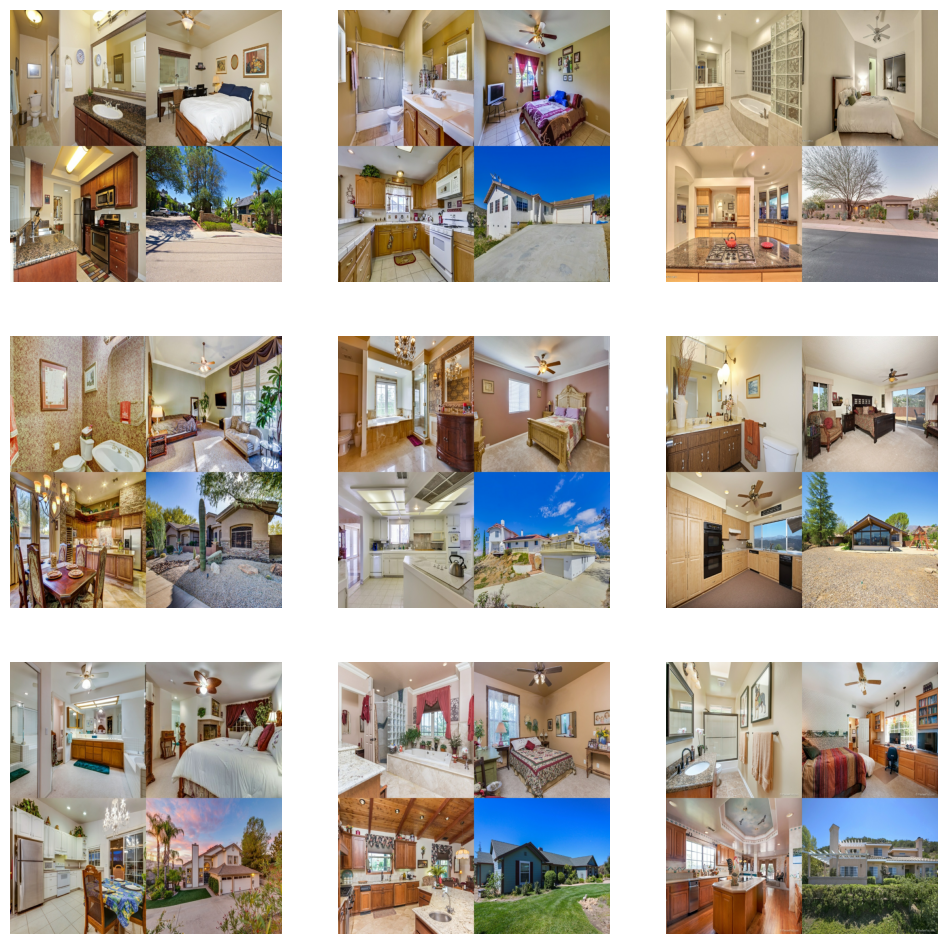

In [115]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i].numpy())
    plt.axis("off")
plt.show()

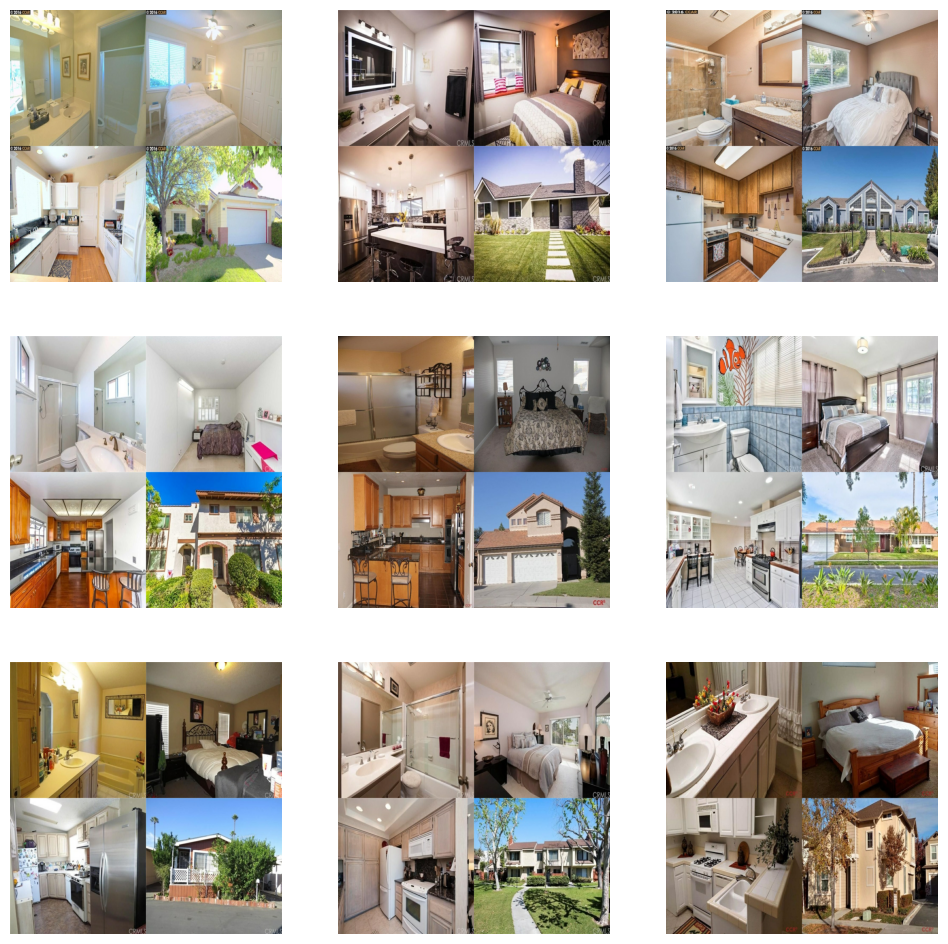

In [116]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].numpy())
    plt.axis("off")
plt.show()

Mean pixel values: [147.48010461 136.72115311 120.58310425]


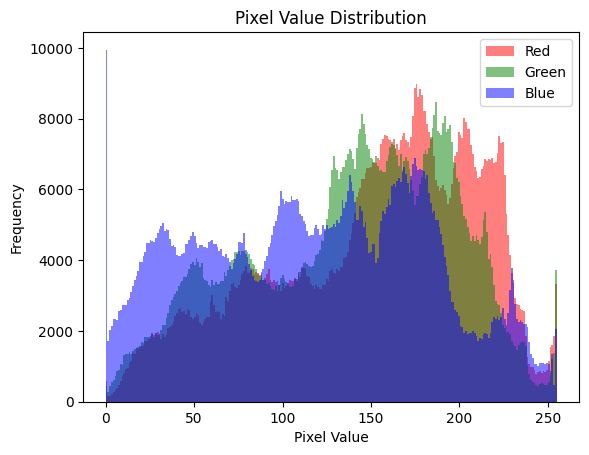

In [ ]:
# Neem een sample van images (bijvoorbeeld 100)
sample_images = train_images[:100]

# Converteer images naar NumPy arrays
image_arrays = [image.numpy() for image in sample_images]

# Bereken de gemiddelde pixelwaarde per kanaal
mean_pixel_values = np.mean(image_arrays, axis=(0, 1, 2))
print(f"Mean pixel values: {mean_pixel_values}")

# Plot histogrammen van pixelwaarden per kanaal
plt.hist(image_arrays[0][:, :, 0].flatten(), bins=256, color='red', alpha=0.5, label='Red')
plt.hist(image_arrays[0][:, :, 1].flatten(), bins=256, color='green', alpha=0.5, label='Green')
plt.hist(image_arrays[0][:, :, 2].flatten(), bins=256, color='blue', alpha=0.5, label='Blue')
plt.legend()
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
display(train_numeriek_df)
display(test_numeriek_df.head())

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226
...,...,...,...,...,...,...,...
495,496,2,2.0,1257,35.6406,-120.7003,380000
496,497,4,2.0,2072,35.6406,-120.7003,429900
497,498,2,2.0,2213,35.6406,-120.7003,585000
498,499,3,2.5,1500,35.6406,-120.7003,319000


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
0,501,3,2.0,2330,35.6406,-120.7003
1,502,3,2.5,1339,35.6406,-120.7003
2,503,3,2.0,1472,35.6406,-120.7003
3,504,4,4.0,2681,35.6406,-120.7003
4,505,3,2.5,1935,33.8085,-117.9228


## Exploratory Data Analysis

###Datatype

In [ ]:
train_numeriek_df.info()
test_numeriek_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   House ID   500 non-null    int64  
 1   Bedrooms   500 non-null    int64  
 2   Bathrooms  500 non-null    float64
 3   Area       500 non-null    int64  
 4   Latitude   500 non-null    float64
 5   Longitude  500 non-null    float64
 6   Price      500 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 27.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   House ID   35 non-null     int64  
 1   Bedrooms   35 non-null     int64  
 2   Bathrooms  35 non-null     float64
 3   Area       35 non-null     int64  
 4   Latitude   35 non-null     float64
 5   Longitude  35 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 1.8 KB


### Kolombeschrijving

**House ID**: Unieke ID voor elk huis (int)  
**Bedrooms**: Het aantal slaapkamers in een huis (int)  
**Bathrooms**: Het aantal badkamers in een huis. Een halve badkamer betekent dan alleen 1 toilet of doucheruimte of wasbak. (float)  
**Area**: Het totale oppervlakte van het huis  
**Latitude**: Coordinaten (float)    
**Latitude**: Coordinaten (float)  
**Price**: De prijs van het huis (int)

### Verdeling van de data

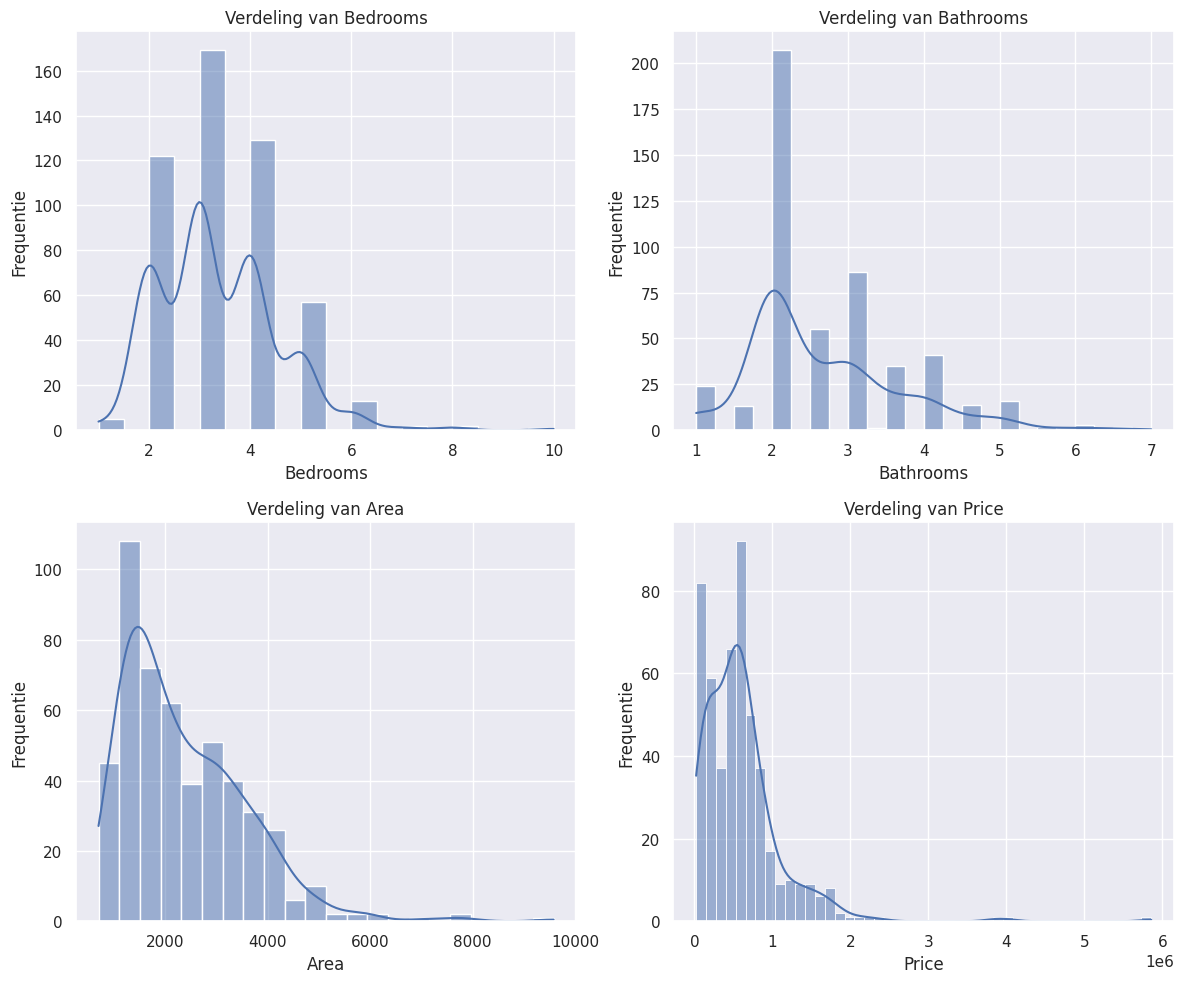

In [ ]:
kolommen = ['Bedrooms', 'Bathrooms', 'Area', 'Price']

sns.set(style="darkgrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rijen, 2 kolommen

# Histogrammen plotten in het raster
ax_index = 0
for rij in range(2):
    for kolom in range(2):
        sns.histplot(train_numeriek_df[kolommen[ax_index]], kde=True, ax=axes[rij, kolom])
        axes[rij, kolom].set_title(f'Verdeling van {kolommen[ax_index]}')
        axes[rij, kolom].set_xlabel(kolommen[ax_index])
        axes[rij, kolom].set_ylabel('Frequentie')
        ax_index += 1

plt.tight_layout()  # Ruimte tussen subplots aanpassen
plt.show()

# Er zijn halve waardes bij bathrooms. Die zijn dan misschien alleen toiletten of wasbakken

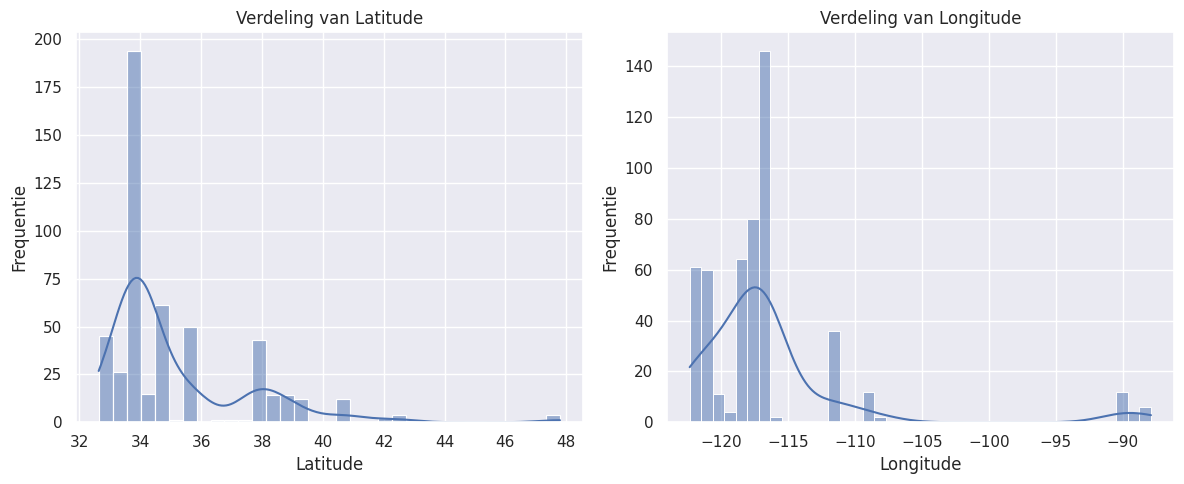

In [ ]:
# Plot histogram voor longtitude en latitude
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 rij, 2 kolommen

# Histogrammen plotten in het raster
ax_index = 0
for kolom in ['Latitude', 'Longitude']:
    sns.histplot(train_numeriek_df[kolom], kde=True, ax=axes[ax_index])
    axes[ax_index].set_title(f'Verdeling van {kolom}')
    axes[ax_index].set_xlabel(kolom)
    axes[ax_index].set_ylabel('Frequentie')
    ax_index += 1

plt.tight_layout()  # Ruimte tussen subplots aanpassen
plt.show()

### Correlaties

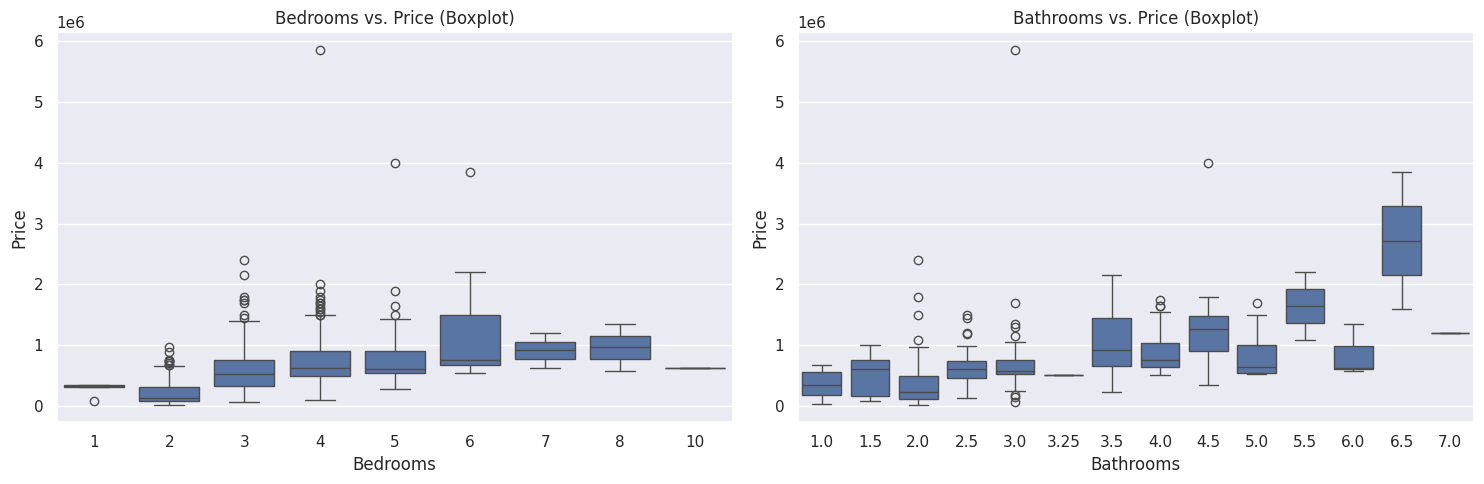

In [ ]:
kolommen = ['Bedrooms', 'Bathrooms']

fig, axes = plt.subplots(1, len(kolommen), figsize=(15, 5))

# Boxplots plotten
for i, kolom in enumerate(kolommen):
    sns.boxplot(x=kolom, y='Price', data=train_numeriek_df, ax=axes[i])
    axes[i].set_title(f'{kolom} vs. Price (Boxplot)')
    axes[i].set_xlabel(kolom)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

#### Bevindingen

**Bedrooms**: Er zit geen sterke lineare verband in deze grafiek. Het blijkt dat huizen met slaapkamers van 1 tot 6 wel een lineare correlatie hebben, maar na 6 slaapkamers verschillen de prijzen niet meer.  
**Bathrooms**: Er blijkt geen lineare verband te zijn in deze grafiek. Maar er is wel te zien dat "halve" badkamers een hogere prijs hebben vergeleken met alleen complete badkamers.  

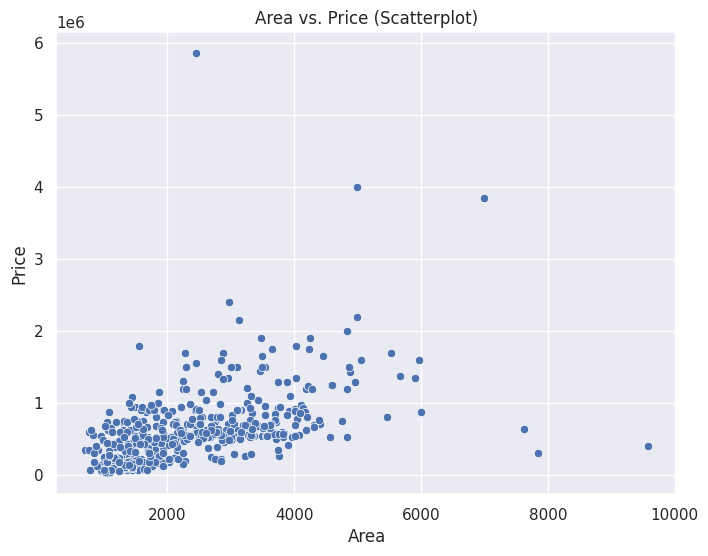

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='Price', data=train_numeriek_df)
plt.title('Area vs. Price (Scatterplot)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

**Area**: In deze grafiek is er wel een relatief linear verband. Het blijkt dat huizen met een grotere oppervlakte wel duurder zijn.

### Conclusie  
Over het algemeen lijkt woonoppervlakte de sterkste invloed te hebben op de huisprijs, terwijl het effect van slaapkamers en badkamers niet zo duidelijk is.

### Visualiseren

## Feature Engineering

In [ ]:
image_paths = tf.io.gfile.glob('/content/drive/MyDrive/Colab Notebooks/Portfolio 1 Datasets/Train/*/*.jpg')
# Vervang het pad met de locatie van je images

images = []
for path in image_paths:
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image)
  images.append(image)

### Data Preparation

In [ ]:
# Removing House ID, Longtitude and Altitude
train_numeriek_df_clean = train_numeriek_df.drop(['House ID', 'Longitude', 'Latitude'], axis=1)
test_numeriek_df_clean = test_numeriek_df.drop(['House ID', 'Longitude', 'Latitude'], axis=1)

#### Normalize

In [ ]:
# Normaliseer de hele dataset met MinMaxScaler
scaler = MinMaxScaler()
train_numeriek_df_clean = pd.DataFrame(scaler.fit_transform(train_numeriek_df_clean), columns=train_numeriek_df_clean.columns)
display(train_numeriek_df_clean)



,Bedrooms,Bathrooms,Area,Price
0,0.333333,0.500000,0.377392,0.145219
1,0.333333,0.333333,0.297456,0.144483
2,0.222222,0.500000,0.362756,0.148561
3,0.444444,0.666667,0.373902,0.152159
4,0.222222,0.500000,0.384485,0.162650
...,...,...,...,...
495,0.111111,0.166667,0.062599,0.061343
496,0.333333,0.166667,0.154357,0.069894
497,0.111111,0.166667,0.170232,0.096470
498,0.222222,0.250000,0.089957,0.050891


### Analysis

## Modeling

In [ ]:
X = train_numeriek_df_clean.drop('Price', axis=1)
y = train_numeriek_df_clean['Price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(train_numeriek_df_clean.shape[1]-1,)), # Input layer met 64 neuronen en ReLU activatie. -1 omdat price niet meegenomen moet worden.
    layers.Dense(32, activation='relu'), # Hidden layer met 32 neuronen en ReLU activatie.
    layers.Dense(1) # Output layer met 1 neuron voor de prijsvoorspelling.
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Evaluate
test_loss, test_mae = model.evaluate(X_val, y_val)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0468 - mae: 0.1531 - val_loss: 0.0037 - val_mae: 0.0471
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mae: 0.0564 - val_loss: 0.0045 - val_mae: 0.0576
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mae: 0.0543 - val_loss: 0.0032 - val_mae: 0.0449
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mae: 0.0462 - val_loss: 0.0032 - val_mae: 0.0461
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mae: 0.0505 - val_loss: 0.0031 - val_mae: 0.0450
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mae: 0.0469 - val_loss: 0.0030 - val_mae: 0.0440
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mae: 0.0475 - val_loss: 0.0030 - val_mae: 0.0448
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mae: 0.0473 - val_loss: 0.0029 - val_mae: 0.0442
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.00

In [ ]:
# Bereken de MAPE
y_pred = model.predict(X_val)
mape = mean_absolute_percentage_error(y_val, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Mean Absolute Percentage Error (MAPE): 207.54%


### Fully-connected neuraal netwerk

### Convolutioneel neuraal netwerk from scratch

In [117]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

train_numeriek_df['filename'] = train_numeriek_df['House ID'].apply(lambda x: f"{img_train_directory}/{x}.jpg")

# Controleer of de bestanden bestaan
invalid_files = []
for file_path in train_numeriek_df['filename']:
    if not os.path.exists(file_path):
        invalid_files.append(file_path)

if invalid_files:
    print(f"Aantal ongeldige bestanden: {len(invalid_files)}")
    print("Voorbeelden van ongeldige bestanden:", invalid_files[:5])
else:
    print("Alle bestanden zijn geldig.")


Alle bestanden zijn geldig.


In [118]:

# Split in train/validation
train_df = train_numeriek_df.sample(frac=0.8, random_state=42)
val_df = train_numeriek_df.drop(train_df.index)


In [134]:
train_df['Price'] = train_df['Price'] / train_df['Price'].max()
val_df['Price'] = val_df['Price'] / val_df['Price'].max()

In [135]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation pipeline
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='',  # Laat leeg als het pad al volledig is in 'filename'
    x_col='filename',
    y_col='Price',
    target_size=(256, 256),
    class_mode='raw',
    batch_size=32
)

# Validation generator
validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='',  # Laat leeg als het pad al volledig is in 'filename'
    x_col='filename',
    y_col='Price',
    target_size=(256, 256),
    class_mode='raw',
    batch_size=32
)

Found 400 validated image filenames.
Found 100 validated image filenames.


In [138]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Import Dropout

# Definieer het CNN-model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Voeg dropout toe om overfitting te verminderen
    Dense(1)  # Output laag voor regressie
])

# Compileer het model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',  # Gebruik MSE voor regressie
              metrics=['mae'])  # Mean Absolute Error als metriek

# Samenvatting van het model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,079,553 (99.49 MB)

 Trainable params: 26,079,553 (99.49 MB)

 Non-trainable params: 0 (0.00 B)

In [139]:
# Train het model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5
)

# Evalueer het model op de validatiedata
loss, mae = model.evaluate(validation_generator)
print(f"Validation Loss (MSE): {loss}")
print(f"Validation MAE: {mae}")

# Voorspel de waarden voor de validatiedata
y_pred = model.predict(validation_generator)
y_true = validation_generator.labels

# Bereken MAPE handmatig
import numpy as np

mape = np.mean(np.abs((y_true - y_pred.flatten()) / y_true)) * 100
print(f"Validation MAPE: {mape:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 97s 8s/step - loss: 49.5743 - mae: 3.1606 - val_loss: 0.0559 - val_mae: 0.1678
Epoch 2/5
 1/12 ━━━━━━━━━━━━━━━━━━━━ 1:02 6s/step - loss: 0.0076 - mae: 0.0746

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - loss: 0.0076 - mae: 0.0746 - val_loss: 0.0661 - val_mae: 0.1850
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 118s 8s/step - loss: 0.0138 - mae: 0.0784 - val_loss: 0.0866 - val_mae: 0.2197
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 708ms/step - loss: 0.0081 - mae: 0.0658 - val_loss: 0.0803 - val_mae: 0.2103
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 142s 9s/step - loss: 0.0087 - mae: 0.0632 - val_loss: 0.0699 - val_mae: 0.1952
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 0.0711 - mae: 0.1973
Validation Loss (MSE): 0.07273627072572708
Validation MAE: 0.19746680557727814
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
Validation MAPE: 66.45%


### Transfer learning

### Multimodaal mode

## Results

### Overview

### Scores

## Conclusion & Advice

In [140]:
test_numeriek_df

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
0,501,3,2.0,2330,35.6406,-120.7003
1,502,3,2.5,1339,35.6406,-120.7003
2,503,3,2.0,1472,35.6406,-120.7003
3,504,4,4.0,2681,35.6406,-120.7003
4,505,3,2.5,1935,33.8085,-117.9228
5,506,3,2.0,1471,33.8085,-117.9228
6,507,3,2.0,1248,33.8085,-117.9228
7,508,3,1.5,1214,33.8085,-117.9228
8,509,4,3.0,1882,33.8085,-117.9228
9,510,2,2.5,987,33.8085,-117.9228


In [159]:
import numpy as np
import pandas as pd

def submission(pred, test_df, filename):
    """
    Creates a submission file for a prediction.

    Args:
        pred (np.ndarray): The predictions.
        test_df (pd.DataFrame): The test dataframe.
        filename (str): The filename of the submission file (must include .csv extension).

    Returns:
        pd.DataFrame: The submission dataframe.
    """
    # Ensure pred is a 1D array and has the same length as test_df
    pred = pred.reshape(-1)  # Flatten if necessary
    pred = pred[:len(test_df)]  # Truncate to match test_df length

    # Create the submission DataFrame
    df = pd.DataFrame({'House ID': test_df['House ID'], 'Price': pred})

    # Save the DataFrame to a CSV file
    df_n = df.to_csv(filename, index=False)

    # Return the DataFrame (optional)
    return df_n

In [160]:
# submission(y_pred, test_numeriek_df, 'CNN1.csv')

## Sources